In [1]:
# loading packages

import os

import pandas as pd
import numpy as np

# plotting packages
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

# Kmeans algorithm from scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


In [2]:
# load raw data
DATA_FOLDER = './'
raw = pd.read_csv(os.path.join(DATA_FOLDER, 'Country_risk_2019_data.csv'))

# check the raw data
print("Size of the dataset (row, col): ", raw.shape)
print("\nFirst 5 rows\n", raw.head(n=5))
print("\nFirst 5 rows and 5 columns\n",raw .iloc[:5 , :5])

Size of the dataset (row, col):  (121, 6)

First 5 rows
      Country Abbrev  Corruption  Peace  Legal  GDP Growth
0    Albania     AL          35  1.821  4.546       2.983
1    Algeria     DZ          35  2.219  4.435       2.553
2  Argentina     AR          45  1.989  5.087      -3.061
3    Armenia     AM          42  2.294  4.812       6.000
4  Australia     AU          77  1.419  8.363       1.713

First 5 rows and 5 columns
      Country Abbrev  Corruption  Peace  Legal
0    Albania     AL          35  1.821  4.546
1    Algeria     DZ          35  2.219  4.435
2  Argentina     AR          45  1.989  5.087
3    Armenia     AM          42  2.294  4.812
4  Australia     AU          77  1.419  8.363


In [3]:
# check for missing values
check = raw.isna().sum()
check

Country       0
Abbrev        0
Corruption    0
Peace         0
Legal         0
GDP Growth    0
dtype: int64

In [4]:
# print summary statistics
print("\nSummary statistics\n", raw.describe())
print("\nCorrelation matrix\n", raw.corr())


Summary statistics
        Corruption       Peace       Legal  GDP Growth
count  121.000000  121.000000  121.000000  121.000000
mean    46.842975    2.001017    5.752529    2.657529
std     18.702499    0.461485    1.373932    2.563741
min     15.000000    1.072000    2.671000   -9.459000
25%     33.000000    1.699000    4.785000    1.249000
50%     41.000000    1.939000    5.455000    2.600000
75%     60.000000    2.294000    6.488000    4.000000
max     87.000000    3.369000    8.712000    7.800000

Correlation matrix
             Corruption     Peace     Legal  GDP Growth
Corruption    1.000000 -0.705002  0.938512   -0.123545
Peace        -0.705002  1.000000 -0.662233   -0.004428
Legal         0.938512 -0.662233  1.000000   -0.150369
GDP Growth   -0.123545 -0.004428 -0.150369    1.000000


<ipython-input-4-cf32c2202de5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("\nCorrelation matrix\n", raw.corr())


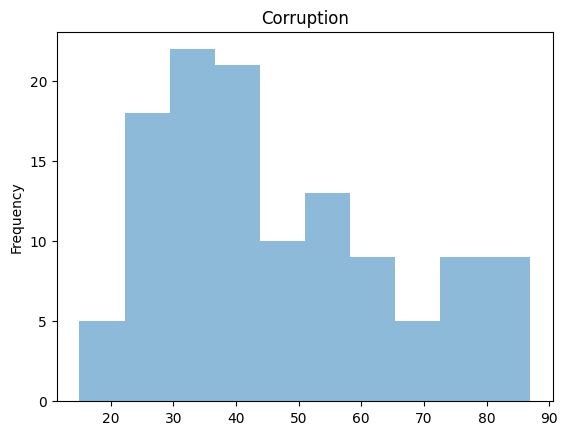

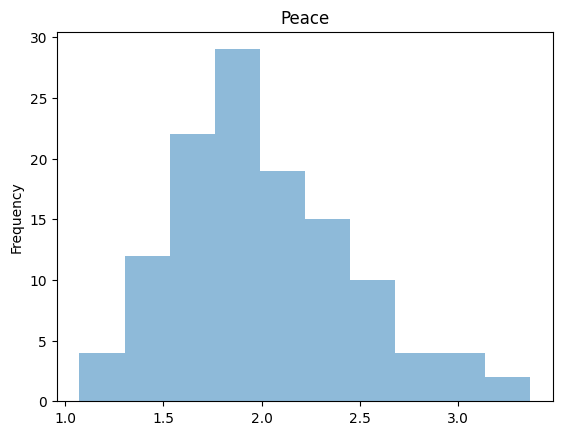

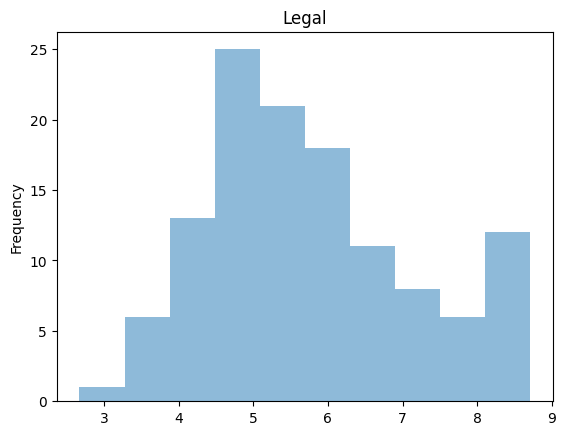

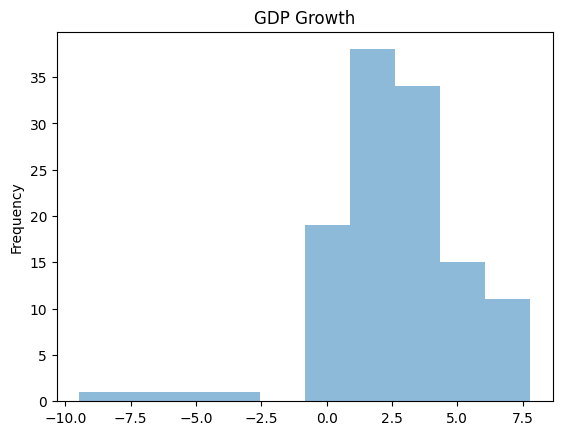

In [5]:
# plot histograms
plt.figure(1)
raw['Corruption'].plot(kind = 'hist', title = 'Corruption', alpha = 0.5)

plt.figure(2)
raw['Peace'].plot(kind = 'hist', title = 'Peace', alpha = 0.5)

plt.figure(3)
raw['Legal'].plot(kind = 'hist', title = 'Legal', alpha = 0.5)

plt.figure(4)
raw['GDP Growth'].plot(kind = 'hist', title = 'GDP Growth', alpha = 0.5)

plt.show()

In [6]:
#K means cluster
#Pick features & normalization
#Since Corruption and Legal are highly correlated, we drop the Courruption variable, i.e., we pick three features for this analysis, Peace, Legal and GDP Grwoth. Let's normalize all the features, effectively making them equally weighted.
X = raw[['Peace', 'Legal', 'GDP Growth','Corruption']]
X = (X - X.mean()) / X.std()
print(X.head(5))

      Peace     Legal  GDP Growth  Corruption
0 -0.390081 -0.878158    0.126952   -0.633230
1  0.472352 -0.958948   -0.040772   -0.633230
2 -0.026039 -0.484397   -2.230541   -0.098542
3  0.634871 -0.684553    1.303747   -0.258948
4 -1.261182  1.900001   -0.368418    1.612460


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

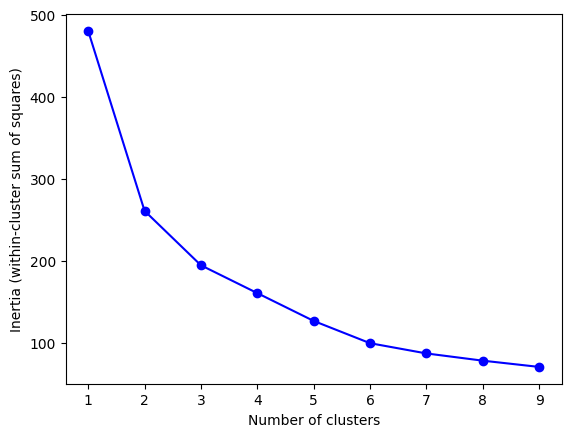

In [7]:
#Perform elbow method
# https://stackoverflow.com/questions/41540751/sklearn-kmeans-equivalent-of-elbow-method
Ks = range(1, 10)
inertia = [KMeans(i).fit(X).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()

In [8]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

inertia for k=3 is 194.4046655009297
cluster centers:  [[-0.89877793  1.12417837 -0.26007806  1.17949284]
 [ 0.17066495 -0.47838646  0.5929059  -0.49863571]
 [ 1.22506036 -0.83385901 -1.07842464 -0.88356071]]
cluster labels:  [1 1 2 1 0 0 1 1 1 0 1 1 1 0 2 1 2 1 0 2 0 1 1 0 1 0 0 2 0 1 2 1 1 0 1 0 0
 1 1 0 1 1 1 1 1 0 1 1 2 0 1 0 1 0 1 1 1 0 1 0 2 2 0 1 1 0 1 1 0 2 1 1 1 1
 1 0 0 2 2 0 0 2 1 2 1 1 0 0 0 1 2 1 2 1 1 1 0 0 0 2 0 1 0 0 0 1 1 1 2 1 2
 1 2 0 0 0 0 1 2 1 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
#List the result
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))


                          Country Abbrev  Label
51                          Italy     IT      0
33                        Estonia     EE      0
35                        Finland     FI      0
36                         France     FR      0
39                        Germany     DE      0
45                        Iceland     IS      0
49                        Ireland     IE      0
53                          Japan     JP      0
57                  Korea (South)     KI      0
59                         Latvia     LV      0
62                      Lithuania     LT      0
65                       Malaysia     MY      0
68                      Mauritius     MU      0
75                    Netherlands     NL      0
76                    New Zealand     NZ      0
79                         Norway     NO      0
80                           Oman     OM      0
86                         Poland     PL      0
87                       Portugal     PT      0
88                          Qatar     QA

In [25]:
result.to_csv('results_kmeans_elbow4features.csv')

In [17]:
#K means cluster
#Pick features & normalization
#Since Corruption and Legal are highly correlated, we drop the Courruption variable, i.e., we pick three features for this analysis, Peace, Legal and GDP Grwoth. Let's normalize all the features, effectively making them equally weighted.
Y = raw[['Peace', 'Legal', 'GDP Growth']]
Y = (Y - Y.mean()) / Y.std()
print(Y.head(5))

      Peace     Legal  GDP Growth
0 -0.390081 -0.878158    0.126952
1  0.472352 -0.958948   -0.040772
2 -0.026039 -0.484397   -2.230541
3  0.634871 -0.684553    1.303747
4 -1.261182  1.900001   -0.368418


In [22]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(Y)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
Z = kmeans.labels_
print("cluster labels: ", Z)

inertia for k=3 is 161.13338710052557
cluster centers:  [[ 1.22506036 -0.83385901 -1.07842464]
 [-0.85097477  1.02149992 -0.23897931]
 [ 0.23006626 -0.54045468  0.65506397]]
cluster labels:  [2 2 0 2 1 1 2 2 2 1 2 2 2 1 0 2 0 2 1 0 1 2 2 1 2 1 1 0 1 2 0 2 2 1 2 1 1
 2 2 1 2 2 2 2 1 1 2 2 0 1 2 1 1 1 1 2 2 1 1 1 0 0 1 2 2 1 2 2 1 0 2 2 2 2
 2 1 1 0 0 1 1 0 2 0 2 2 1 1 1 1 0 2 0 2 2 2 1 1 1 0 1 2 1 1 1 2 2 2 0 2 0
 2 0 1 1 1 1 2 0 2 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':Z})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))

                          Country Abbrev  Label
60                        Lebanon     LB      0
30                        Ecuador     EC      0
48                           Iran     IR      0
61                        Liberia     LR      0
69                         Mexico     MX      0
77                      Nicaragua     NI      0
78                        Nigeria     NG      0
81                       Pakistan     PK      0
83                       Paraguay     PY      0
90                         Russia     RU      0
92                   Saudi Arabia     SA      0
99                   South Africa     ZA      0
108           Trinidad and Tobago     TT      0
110                        Turkey     TR      0
112                       Ukraine     UA      0
118                         Yemen     YE      0
27   Democratic Republic of Congo     CD      0
19                           Chad     TD      0
120                      Zimbabwe     ZW      0
14                         Brazil     BR

In [20]:
result.to_csv('results_kmeans_elbow_3features.csv')

In [31]:
# load raw data
DATA_FOLDER = './'
raw_2 = pd.read_csv(os.path.join(DATA_FOLDER, 'Country_risk_2019_data.csv'))

In [32]:
#K means cluster
#Pick features & normalization
#Since Corruption and Legal are highly correlated, we drop the Courruption variable, i.e., we pick three features for this analysis, Peace, Legal and GDP Grwoth. Let's normalize all the features, effectively making them equally weighted.
P = raw_2[['Peace', 'Legal', 'GDP Growth']]
P = (P - P.mean()) / P.std()
print(P.head(5))

      Peace     Legal  GDP Growth
0 -0.400182 -0.849636    0.148881
1  0.458391 -0.929350    0.047927
2 -0.037769 -0.461122   -1.270112
3  0.620183 -0.658611    0.857204
4 -1.267384  1.891504   -0.149286


In [33]:
#K means with k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(P)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

inertia for k=3 is 147.35815961158323
cluster centers:  [[ 0.50083526 -0.57899064  0.14262782]
 [ 1.4334541  -2.03528534 -8.76865913]
 [-0.9090402   1.05949011 -0.05031098]]
cluster labels:  [0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 2 0 0 2 0 2 2 0 2 0 0 0 0 2 0 2 2
 0 0 2 0 0 0 0 2 2 0 0 0 2 0 2 0 2 0 0 0 2 0 2 0 0 2 0 0 2 0 0 2 0 0 0 0 0
 0 2 2 0 0 2 2 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 2 2 2 0 2 0 2 2 2 0 0 0 0 0 0
 0 0 2 2 2 2 0 0 0 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
#List the result
result = pd.DataFrame({'Country':raw_2['Country'], 'Abbrev':raw_2['Abbrev'], 'Label':y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))

                          Country Abbrev  Label
0                         Albania     AL      0
78                        Nigeria     NG      0
77                      Nicaragua     NI      0
74                          Nepal     NP      0
73                     Mozambique     MZ      0
72                        Morocco     MA      0
71                     Montenegro     ME      0
70                        Moldova     FM      0
69                         Mexico     MX      0
67                     Mauritania     MR      0
81                       Pakistan     PK      0
66                           Mali     ML      0
63                     Madagascar     MG      0
61                        Liberia     LR      0
120                      Zimbabwe     ZW      0
58                         Kuwait     KW      0
56                          Kenya     KE      0
55                     Kazakhstan     KZ      0
54                         Jordan     JO      0
52                        Jamaica     JM

In [37]:
result.to_csv('results_kmeans_elbow_VN.csv')